# Toronto Census Tracts Internal Composition

In [1]:
import numpy as np
import pandas as pd
import folium
from folium import plugins
import json
import matplotlib
from matplotlib import pyplot as plt

In [2]:
# read in Census.csv
census = pd.read_csv('census.csv')

In [3]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 24 columns):
GEOUID        5770 non-null float64
CTNAME        5770 non-null float64
TOTAL_POP     5694 non-null float64
_0_4          5694 non-null float64
_5_9          5694 non-null float64
_10_14        5694 non-null float64
_15_19        5694 non-null float64
_20_24        5694 non-null float64
_25_29        5694 non-null float64
_30_34        5694 non-null float64
_35_39        5694 non-null float64
_40_44        5694 non-null float64
_45_49        5694 non-null float64
_50_54        5694 non-null float64
_55_59        5694 non-null float64
_60_64        5694 non-null float64
_65_69        5694 non-null float64
_70_74        5694 non-null float64
_75_79        5694 non-null float64
_80_84        5694 non-null float64
_85_89        5694 non-null float64
_90_94        5694 non-null float64
_95_99        5694 non-null float64
_100_ABOVE    5694 non-null float64
dtypes: float64(24)
memory us

In [4]:
nulls = census.columns[census.isnull().any()]
census[nulls].isnull().sum()

TOTAL_POP     76
_0_4          76
_5_9          76
_10_14        76
_15_19        76
_20_24        76
_25_29        76
_30_34        76
_35_39        76
_40_44        76
_45_49        76
_50_54        76
_55_59        76
_60_64        76
_65_69        76
_70_74        76
_75_79        76
_80_84        76
_85_89        76
_90_94        76
_95_99        76
_100_ABOVE    76
dtype: int64

In [5]:
census[census.isnull().any(axis=1)][nulls].head()

,TOTAL_POP,_0_4,_5_9,_10_14,_15_19,_20_24,_25_29,_30_34,_35_39,_40_44,...,_55_59,_60_64,_65_69,_70_74,_75_79,_80_84,_85_89,_90_94,_95_99,_100_ABOVE
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# indices_null = census[census['TOTAL_POP'].isnull()].index.tolist()

In [7]:
# popcensus = census[~census.index.isin(indices_null)]

the CTUID key in the geojson file must be converted to integer, as it is currently of string type

In [8]:
# open the geojson file
with open('Toronto_WGS84.geojson') as f:
    ct = json.load(f)

# create a list to track the used keys
ids_used = list()

for i in ct['features']:
    # write the CTUID key one level up (although not necessary, it makes later coding a bit cleaner)
    i['CTUID'] = float(i['properties']['CTUID'])
    # add the used key to ids_used dictionary with None in place of value
    ids_used.append(i['CTUID'])

In [9]:
len(ids_used)

572

Time to retain the tract informaiton that are present in the City of Toronto

In [10]:
popcensus = census[census['GEOUID'].isin(ids_used)]

In [11]:
popcensus.shape

(572, 24)

In [12]:
popcensus

,GEOUID,CTNAME,TOTAL_POP,_0_4,_5_9,_10_14,_15_19,_20_24,_25_29,_30_34,...,_55_59,_60_64,_65_69,_70_74,_75_79,_80_84,_85_89,_90_94,_95_99,_100_ABOVE
2069,5350001.00,1.00,595.0,40.0,30.0,10.0,20.0,30.0,35.0,75.0,...,45.0,25.0,15.0,15.0,10.0,15.0,0.0,5.0,0.0,0.0
2070,5350002.00,2.00,620.0,20.0,20.0,20.0,40.0,40.0,25.0,20.0,...,55.0,80.0,90.0,50.0,10.0,10.0,10.0,5.0,5.0,0.0
2071,5350003.00,3.00,750.0,25.0,10.0,10.0,10.0,30.0,75.0,95.0,...,55.0,45.0,30.0,30.0,15.0,35.0,35.0,25.0,20.0,5.0
2072,5350004.00,4.00,6690.0,270.0,210.0,180.0,230.0,470.0,835.0,835.0,...,460.0,365.0,290.0,155.0,135.0,85.0,65.0,20.0,10.0,0.0
2073,5350005.00,5.00,6420.0,235.0,180.0,190.0,220.0,480.0,965.0,935.0,...,340.0,280.0,260.0,155.0,145.0,110.0,60.0,30.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,5350378.26,378.26,4760.0,240.0,305.0,300.0,380.0,380.0,380.0,315.0,...,390.0,285.0,225.0,100.0,70.0,55.0,25.0,10.0,0.0,0.0
2637,5350378.27,378.27,5805.0,360.0,405.0,410.0,420.0,465.0,420.0,395.0,...,380.0,315.0,200.0,130.0,70.0,45.0,25.0,10.0,5.0,0.0
2638,5350378.28,378.28,7175.0,355.0,410.0,375.0,520.0,580.0,595.0,470.0,...,500.0,505.0,450.0,300.0,170.0,95.0,50.0,20.0,5.0,5.0
3174,5350802.01,802.01,3830.0,175.0,235.0,210.0,245.0,255.0,185.0,205.0,...,360.0,310.0,250.0,125.0,90.0,55.0,35.0,10.0,5.0,0.0


Create the different demographics groups: under 15, under 25, under 40, under 85, under 100, above 100

In [13]:
popcensus['Under15'] = ((popcensus.iloc[: , 3] + popcensus.iloc[: , 4] + popcensus.iloc[: , 5])/ popcensus.iloc[:, 2]) * 100

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
popcensus['Under25'] = ((popcensus.iloc[: , 6] + popcensus.iloc[: , 7])/ popcensus.iloc[:, 2]) * 100

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
popcensus['Under40'] = ((popcensus.iloc[: , 8] + popcensus.iloc[: , 9] + popcensus.iloc[: , 10])/ popcensus.iloc[:, 2]) * 100

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
pd.set_option('display.max_columns', 50)

In [17]:
popcensus['Under65'] = ((popcensus.iloc[: , 11] + popcensus.iloc[: , 12] + popcensus.iloc[: , 13] + popcensus.iloc[: , 14] + popcensus.iloc[: , 15])/ popcensus.iloc[:, 2]) * 100

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
popcensus['Under85'] = ((popcensus.iloc[: , 16] + popcensus.iloc[: , 17] + popcensus.iloc[: , 18] + popcensus.iloc[: , 19])/ popcensus.iloc[:, 2]) * 100

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
popcensus['Under100'] = ((popcensus.iloc[: , 20] + popcensus.iloc[: , 21] + popcensus.iloc[: , 22])/ popcensus.iloc[:, 2]) * 100

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
popcensus['Above100'] = (popcensus.iloc[: , 23]/ popcensus.iloc[:, 2]) * 100

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
popcensus.shape

(572, 31)

In [22]:
popcensus.tail()

,GEOUID,CTNAME,TOTAL_POP,_0_4,_5_9,_10_14,_15_19,_20_24,_25_29,_30_34,_35_39,_40_44,_45_49,_50_54,_55_59,_60_64,_65_69,_70_74,_75_79,_80_84,_85_89,_90_94,_95_99,_100_ABOVE,Under15,Under25,Under40,Under65,Under85,Under100,Above100
2636,5350378.26,378.26,4760.0,240.0,305.0,300.0,380.0,380.0,380.0,315.0,285.0,280.0,335.0,405.0,390.0,285.0,225.0,100.0,70.0,55.0,25.0,10.0,0.0,0.0,17.752101,15.966387,20.588235,35.609244,9.453782,0.735294,0.000000
2637,5350378.27,378.27,5805.0,360.0,405.0,410.0,420.0,465.0,420.0,395.0,390.0,410.0,490.0,470.0,380.0,315.0,200.0,130.0,70.0,45.0,25.0,10.0,5.0,0.0,20.241171,15.245478,20.757967,35.572782,7.665805,0.689061,0.000000
2638,5350378.28,378.28,7175.0,355.0,410.0,375.0,520.0,580.0,595.0,470.0,435.0,380.0,435.0,530.0,500.0,505.0,450.0,300.0,170.0,95.0,50.0,20.0,5.0,5.0,15.888502,15.331010,20.905923,32.752613,14.146341,1.045296,0.069686
3174,5350802.01,802.01,3830.0,175.0,235.0,210.0,245.0,255.0,185.0,205.0,235.0,255.0,275.0,320.0,360.0,310.0,250.0,125.0,90.0,55.0,35.0,10.0,5.0,0.0,16.187990,13.054830,16.318538,39.686684,13.577023,1.305483,0.000000
3175,5350802.02,802.02,5675.0,285.0,295.0,295.0,365.0,385.0,270.0,290.0,325.0,315.0,360.0,480.0,545.0,445.0,350.0,250.0,125.0,120.0,90.0,55.0,15.0,0.0,15.418502,13.215859,15.594714,37.797357,14.889868,2.819383,0.000000


In [23]:
popcensus.head()

,GEOUID,CTNAME,TOTAL_POP,_0_4,_5_9,_10_14,_15_19,_20_24,_25_29,_30_34,_35_39,_40_44,_45_49,_50_54,_55_59,_60_64,_65_69,_70_74,_75_79,_80_84,_85_89,_90_94,_95_99,_100_ABOVE,Under15,Under25,Under40,Under65,Under85,Under100,Above100
2069,5350001.0,1.0,595.0,40.0,30.0,10.0,20.0,30.0,35.0,75.0,65.0,60.0,60.0,60.0,45.0,25.0,15.0,15.0,10.0,15.0,0.0,5.0,0.0,0.0,13.445378,8.403361,29.411765,42.016807,9.243697,0.840336,0.000000
2070,5350002.0,2.0,620.0,20.0,20.0,20.0,40.0,40.0,25.0,20.0,20.0,20.0,25.0,45.0,55.0,80.0,90.0,50.0,10.0,10.0,10.0,5.0,5.0,0.0,9.677419,12.903226,10.483871,36.290323,25.806452,3.225806,0.000000
2071,5350003.0,3.0,750.0,25.0,10.0,10.0,10.0,30.0,75.0,95.0,60.0,60.0,40.0,45.0,55.0,45.0,30.0,30.0,15.0,35.0,35.0,25.0,20.0,5.0,6.000000,5.333333,30.666667,32.666667,14.666667,10.666667,0.666667
2072,5350004.0,4.0,6690.0,270.0,210.0,180.0,230.0,470.0,835.0,835.0,600.0,500.0,520.0,455.0,460.0,365.0,290.0,155.0,135.0,85.0,65.0,20.0,10.0,0.0,9.865471,10.463378,33.931241,34.379671,9.940209,1.420030,0.000000
2073,5350005.0,5.0,6420.0,235.0,180.0,190.0,220.0,480.0,965.0,935.0,615.0,465.0,390.0,365.0,340.0,280.0,260.0,155.0,145.0,110.0,60.0,30.0,5.0,0.0,9.423676,10.903427,39.174455,28.660436,10.436137,1.479751,0.000000


In [24]:
# main map
m = folium.Map(location=[43.653908, -79.384293], zoom_start=11)

# mini map plugin
mm = plugins.MiniMap(toggle_display=True, zoom_start=8)
m.add_child(mm)
############################################################## 
# Function to set the legend scale
def legScaleAll(n, df, theZip):
    maxNum = np.ceil(df[n[0]].max())
    if maxNum >= 5:
        stop = np.ceil(maxNum / 5)
        return [0, stop, stop*2, stop*3, stop*4, maxNum]
    else:
        stop = np.round(maxNum / 5, 2)
        return sorted([0, stop, stop*2, stop*3, stop*4, maxNum])   
############################################################## 
# feature groups 
under15 = folium.FeatureGroup(name='Under 15', overlay=False).add_to(m)
under25 = folium.FeatureGroup(name='Under 25', overlay=False).add_to(m)
under40 = folium.FeatureGroup(name='Under 40', overlay=False).add_to(m)
under65 = folium.FeatureGroup(name='Under 65', overlay=False).add_to(m)
under85 = folium.FeatureGroup(name='Under 85', overlay=False).add_to(m)
under100 = folium.FeatureGroup(name='Under 100', overlay=False).add_to(m)
above100 = folium.FeatureGroup(name='Above 100', overlay=False).add_to(m)
##############################################################  
# features list
feat = [under15, under25, under40, under65, under85, under100, above100]

# column headers
groupNames = ['Under15', 'Under25', 'Under40', 'Under65','Under85', 'Under100', 'Above100']

# zipping together the lists
featNames = zip(groupNames, feat)
##############################################################  
for i in featNames:
    mapped_OK = folium.Choropleth(
        geo_data=ct,
        name='Toronto Census Tracts',
        fill_color='RdYlGn',
        fill_opacity=0.7,
        line_opacity=0.3,
        threshold_scale=legScaleAll(i, popcensus, featNames),
        legend_name='Demographics (%)',
        data=popcensus,
        key_on='feature.CTUID',
        columns=['GEOUID', '{}'.format(i[0])],
        highlight=True
    ).geojson.add_to(i[1])

    folium.GeoJson(data=ct,
        name='Toronto',
        smooth_factor=2,
        style_function=lambda x: {'color':'black','fillColor':'transparent','opacity':0.4},
        tooltip=folium.GeoJsonTooltip(fields=['CTUID'], labels=False, sticky=True),
        highlight_function=lambda x: {'weight':0.3,'fillColor':'grey'},
    ).add_to(mapped_OK)
##############################################################
# add tiles
folium.raster_layers.TileLayer('Open Street Map').add_to(m)
# add Layer Control
folium.LayerControl(collapsed=False).add_to(m)
# save map to html page
m.save('Population_Demographics_AllGroups_noLegend.html')

In [25]:
m1 = folium.Map(location=[43.653908, -79.384293], zoom_start=11)

# Function for legend scale
def legScale1column(df, col):
    maxNum = np.ceil(df[col].max())
    if maxNum >= 5:
        stop = np.ceil(maxNum / 5)
        return [0, stop, stop*2, stop*3, stop*4, maxNum]
    else:
        stop = np.round(maxNum / 5, 2)
        return sorted([0, stop, stop*2, stop*3, stop*4, maxNum])
##############################################################
column = 'Above100'

mapped_OK = folium.Choropleth(
        geo_data=ct,
        name='Toronto Census Tracts',
        fill_color='RdYlGn',
        fill_opacity=0.7,
        line_opacity=0.3,
        threshold_scale=legScale1column(popcensus, column),
        legend_name='{} Demographics (%)'.format(column),
        data=popcensus,
        key_on='feature.CTUID',
        columns=['GEOUID', '{}'.format(column)],
        highlight=True
    ).add_to(m1)
##############################################################
# add tiles
folium.raster_layers.TileLayer('Open Street Map').add_to(m1)
folium.raster_layers.TileLayer('CartoDB Dark_Matter').add_to(m1)
folium.raster_layers.TileLayer('Stamen Toner').add_to(m1)
folium.raster_layers.TileLayer('CartoDB Positron').add_to(m1)
# add Layer Control
folium.LayerControl().add_to(m1)
# save map to html page
m1.save('Population_Demographics_{}.html'.format(column))

In [26]:
# dir(np)

In [27]:
mapdf = popcensus[popcensus.index.isin(ids_used)]

In [28]:
len(mapdf)

0

Exhausted the available id list

In [29]:
analysisdf = popcensus.loc[:, ['GEOUID','TOTAL_POP','Under15','Under25','Under40','Under65','Under85','Under100','Above100']]

In [30]:
analysisdf

,GEOUID,TOTAL_POP,Under15,Under25,Under40,Under65,Under85,Under100,Above100
2069,5350001.00,595.0,13.445378,8.403361,29.411765,42.016807,9.243697,0.840336,0.000000
2070,5350002.00,620.0,9.677419,12.903226,10.483871,36.290323,25.806452,3.225806,0.000000
2071,5350003.00,750.0,6.000000,5.333333,30.666667,32.666667,14.666667,10.666667,0.666667
2072,5350004.00,6690.0,9.865471,10.463378,33.931241,34.379671,9.940209,1.420030,0.000000
2073,5350005.00,6420.0,9.423676,10.903427,39.174455,28.660436,10.436137,1.479751,0.000000
...,...,...,...,...,...,...,...,...,...
2636,5350378.26,4760.0,17.752101,15.966387,20.588235,35.609244,9.453782,0.735294,0.000000
2637,5350378.27,5805.0,20.241171,15.245478,20.757967,35.572782,7.665805,0.689061,0.000000
2638,5350378.28,7175.0,15.888502,15.331010,20.905923,32.752613,14.146341,1.045296,0.069686
3174,5350802.01,3830.0,16.187990,13.054830,16.318538,39.686684,13.577023,1.305483,0.000000


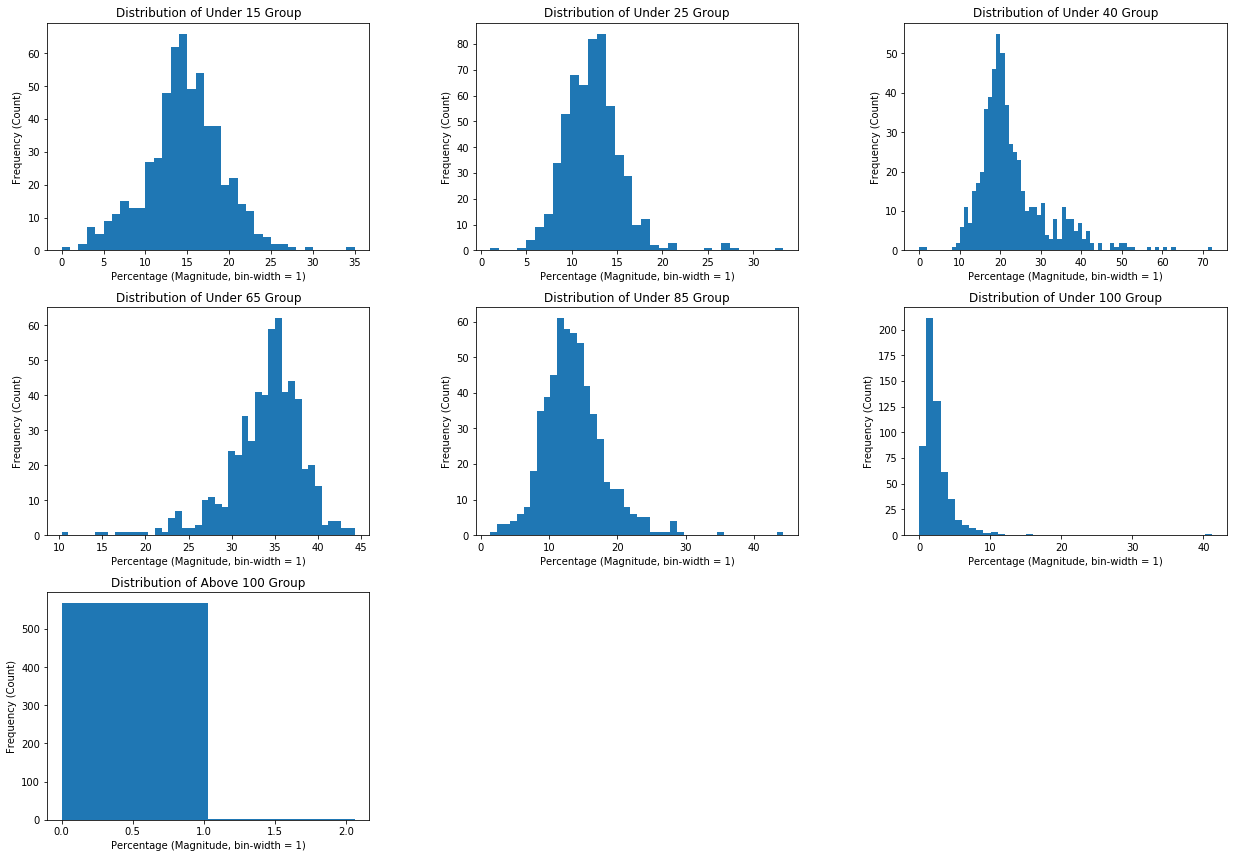

In [93]:
# find max bin number
def maxBinCount(col, df):
    return int(np.floor(df[col].max()))

# set the label right
def legName(col):
    return '{0} {1}'.format(col[:5], col[5:])

for i, item in enumerate(groupNames, start=1):
    plt.subplot(3,3, i)
    plt.hist([analysisdf[item]], bins=maxBinCount(item, analysisdf))
#     plt.legend(legName(item))
    plt.ylabel('Frequency (Count)')
    plt.xlabel('Percentage (Magnitude, bin-width = 1)')
    plt.title('Distribution of {} Group'.format(legName(item)))
plt.tight_layout(pad=1, w_pad=1, h_pad=1, rect=(0,0,3,3))

Look at the composition of the internally oldest census tract

In [43]:
oldestdf = analysisdf[analysisdf.GEOUID == 5350376.06]

In [44]:
oldestdf

,GEOUID,TOTAL_POP,Under15,Under25,Under40,Under65,Under85,Under100,Above100
2601,5350376.06,485.0,0.0,1.030928,1.030928,10.309278,44.329897,41.237113,2.061856


In [88]:
def labelValues(df):
    c = 0
    labels = []
    values = []
    for col in df.columns:
        if c >= 2:
            labels.append(col)
            values.append(np.round(float(df[col]),2))
        c += 1
    return [labels, values]

# labelValues(oldestdf)
    
dff = pd.DataFrame({'Demographics Groups': labelValues(oldestdf)[1]}, index=labelValues(oldestdf)[0])

dff

,Demographics Groups
Under15,0.00
Under25,1.03
Under40,1.03
Under65,10.31
Under85,44.33
Under100,41.24
Above100,2.06


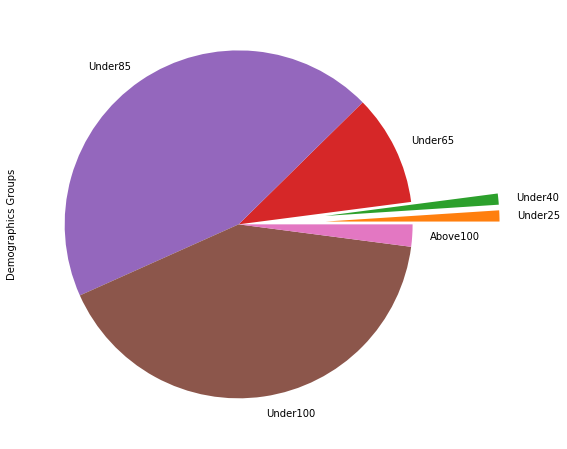

In [92]:
explode = (0,0.5,0.5,0,0,0,0)
     
dff.plot.pie(y='Demographics Groups', figsize=(8,8), explode=explode, legend=False)